In [1]:
import os 
import glob
import torch
import numpy as np

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline


import config
import dataset

In [2]:
print(config.DATA_DIR)
image_files = glob.glob(os.path.join(config.DATA_DIR, "*.png"))
print(len(image_files))    
targets_orig = [x.split("/")[-1][:-4] for x in image_files]
targets = [[c for c in x] for x in targets_orig]
target_flat = [c for clist in targets for c in clist]

lbl_enc = preprocessing.LabelEncoder()
lbl_enc.fit(target_flat)
targets_enc = [lbl_enc.transform(x) for x in targets]
targets_enc = np.array(targets_enc) + 1
print(targets_enc)
print(len(lbl_enc.classes_))

train_imgs, test_imgs, train_targets, test_targets, train_orig_targets, test_orig_targets = model_selection.train_test_split(image_files, targets_enc, targets_orig, test_size=0.1, random_state=42)

train_dataset = dataset.Classification(image_paths=train_imgs, targets= train_targets, resize=(config.IMAGE_HEIGHT, config.IMAGE_WIDTH))
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=config.BATCH_SIZE, num_workers=config.NUM_WORKERS, shuffle=True)


test_dataset = dataset.Classification(image_paths=test_imgs, targets= test_targets, resize=(config.IMAGE_HEIGHT, config.IMAGE_WIDTH))
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=config.BATCH_SIZE, num_workers=config.NUM_WORKERS, shuffle=False )




../input/captcha_images_v2
1040
[[12 10 21 ...  5 19 13]
 [12 10 21 ... 13  4 20]
 [12 10 21 ...  4  5 16]
 ...
 [12 10 21 ...  7  1  3]
 [12 10 21 ... 16  4 16]
 [12 10 21 ... 20  4  6]]
27


In [5]:
npimg = train_dataset[0]["images"]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6225708].


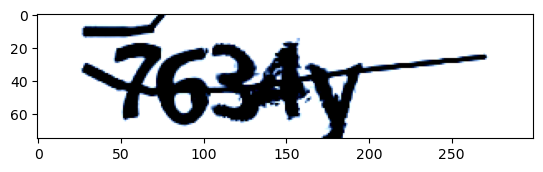

In [7]:
plt.imshow(np.transpose(npimg, (1,2,0)))